In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("house_price.csv")
df

,House_Size,Num_Rooms,Num_Bathrooms,Age,Distance_to_City,Price
0,1360,6,1,24,6.95,250.96
1,4272,7,1,10,16.17,857.95
2,3592,2,4,14,19.39,612.19
3,966,2,2,6,17.28,240.90
4,4926,2,1,3,3.24,750.50
...,...,...,...,...,...,...
795,2843,3,2,8,17.77,490.25
796,2363,7,2,5,1.99,546.29
797,1818,7,2,28,4.63,427.96
798,4097,4,1,16,6.89,689.53


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,House_Size,Num_Rooms,Num_Bathrooms,Age,Distance_to_City,Price
0,1360,6,1,24,6.95,250.96
1,4272,7,1,10,16.17,857.95
2,3592,2,4,14,19.39,612.19
3,966,2,2,6,17.28,240.90
4,4926,2,1,3,3.24,750.50
...,...,...,...,...,...,...
795,2843,3,2,8,17.77,490.25
796,2363,7,2,5,1.99,546.29
797,1818,7,2,28,4.63,427.96
798,4097,4,1,16,6.89,689.53


In [5]:
x=df.drop("Price",axis=1)
y=df["Price"]
y

0      250.96
1      857.95
2      612.19
3      240.90
4      750.50
        ...  
795    490.25
796    546.29
797    427.96
798    689.53
799    832.13
Name: Price, Length: 800, dtype: float64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [8]:
y_pred=model.predict(x_test)
y_pred

array([561.6324, 186.216 , 634.7006, 575.048 , 268.9184, 611.1924,
       305.4304, 323.2288, 550.9674, 615.7474, 465.4354, 281.6422,
       453.5438, 244.7562, 213.0546, 535.912 , 285.1504, 356.0358,
       370.8446, 414.1236, 896.272 , 621.0314, 691.9858, 381.1344,
       466.198 , 650.4188, 252.5618, 670.3532, 783.191 , 234.922 ,
       566.941 , 539.9304, 583.2362, 544.1912, 195.8088, 466.7734,
       465.919 , 556.4824, 522.7874, 433.4462, 707.0072, 466.7514,
       484.6812, 878.6958, 256.6974, 695.814 , 362.0252, 222.3966,
       501.3698, 230.914 , 550.675 , 455.2948, 274.5328, 668.6318,
       318.5994, 713.4998, 248.6142, 579.2962, 664.2396, 265.0356,
       411.4388, 544.1684, 550.7588, 795.9498, 377.1158, 812.0492,
       653.165 , 594.4658, 489.2728, 668.6908, 735.4814, 250.6978,
       482.6804, 249.1202, 646.3604, 810.6734, 439.1494, 446.6606,
       328.1592, 383.542 , 708.3328, 348.8564, 252.9726, 452.6754,
       495.9956, 808.1898, 389.3864, 436.6808, 516.7158, 210.2

In [9]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

3598.4419770420013
59.98701507028001


In [10]:
score=r2_score(y_pred,y_test)
score

0.8950874408821275

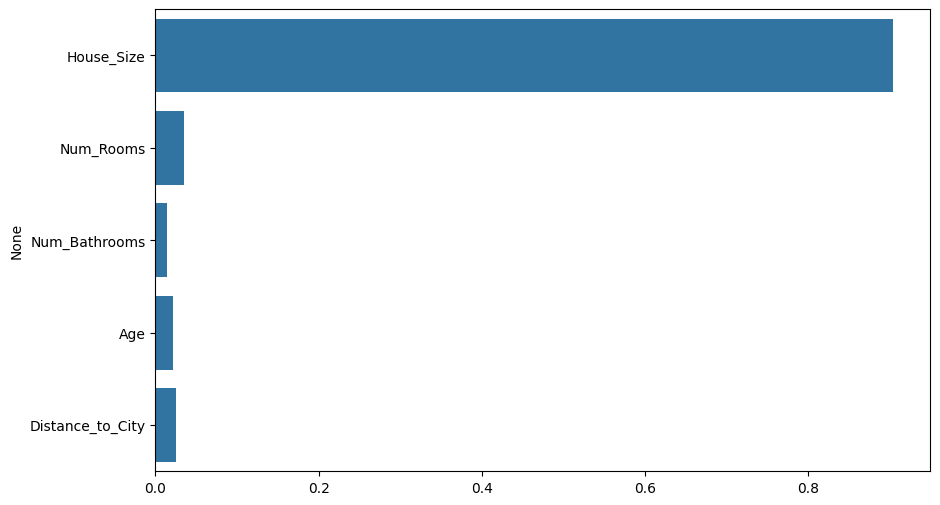

In [11]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [12]:
data=pd.DataFrame({
    "House_Size":[1360],
    "Num_Rooms":[6],
    "Num_Bathrooms":[1],
    "Age":[24],
    "Distance_to_City":[6.95]
})
predi=model.predict(data)
predi

array([303.9316])